In [25]:
# Linear Regression from scratch only using mathematics


# Defining my Linear Regression
class simpleLinearRegression:
    def __init__(self):
        self.m = 0
        self.b = 0

    # Fit method ( using mathematical formulas to make Simple Lineear Regression mmodel )
    def fit(self, x_train, y_train):
        num = 0
        den = 0
        x_mean = x_train.mean()
        y_mean = y_train.mean()

        for i in range(x_train.shape[0]):
            num += (x_train[i] - x_mean) * (y_train[i] - y_mean)
            den += (x_train[i] - x_mean) ** 2

        self.m = num / den
        self.b = y_mean - (self.m * x_mean)

    # predict method to use the trained algorithm
    def predict(self, x_test):
        return self.m * x_test + self.b


In [27]:
import numpy as np

# function to generate a raw data
def generate_lr_data(
    n_samples=200,
    n_features=1,
    noise_std=1.0,
    weight_range=(-5, 5),
    bias_range=(-3, 3),
    x_range=(-10, 10),
    add_outliers=False,
    outlier_ratio=0.05,
    outlier_strength=15,
    seed=42
):
    """
    Generate synthetic Linear Regression data:
        y = Xw + b + noise

    Returns:
        X : (n_samples, n_features)
        y : (n_samples, 1)
        true_w : (n_features, 1)
        true_b : float
    """
    rng = np.random.default_rng(seed)

    # Features
    X = rng.uniform(x_range[0], x_range[1], size=(n_samples, n_features))

    # True weights and bias
    true_w = rng.uniform(weight_range[0], weight_range[1], size=(n_features, 1))
    true_b = rng.uniform(bias_range[0], bias_range[1])

    # Perfect line/plane
    y_clean = X @ true_w + true_b

    # Add Gaussian noise
    noise = rng.normal(0, noise_std, size=(n_samples, 1))
    y = y_clean + noise

    # Optionally add outliers
    if add_outliers:
        n_outliers = int(n_samples * outlier_ratio)
        outlier_indices = rng.choice(n_samples, n_outliers, replace=False)

        # Make y much bigger/smaller randomly
        y[outlier_indices] += rng.normal(0, outlier_strength, size=(n_outliers, 1))

    return X, y, true_w, true_b


def train_test_split_manual(X, Y, test_size=0.2, random_state=42):
    rng = np.random.default_rng(random_state)

    X = np.array(X)
    Y = np.array(Y).reshape(-1, 1)

    n_samples = X.shape[0]

    indices = np.arange(n_samples)
    rng.shuffle(indices)

    test_count = int(n_samples * test_size)

    test_idx = indices[:test_count]
    train_idx = indices[test_count:]

    return X[train_idx], X[test_idx], Y[train_idx], Y[test_idx]



In [77]:
X, y, w_true, b_true = generate_lr_data(
    n_samples=150,
    n_features=1,
    noise_std=2.0,
    seed=7
)


X

array([[ 2.50190933],
       [ 7.94427602],
       [ 5.5137138 ],
       [-5.4958562 ],
       [-3.9966743 ],
       [ 7.47106891],
       [-9.89469391],
       [ 6.42456837],
       [ 5.94138858],
       [-0.64130094],
       [-3.93935146],
       [-4.43148776],
       [-4.90260825],
       [-1.09847388],
       [ 0.09096518],
       [ 1.06994704],
       [ 9.91000567],
       [ 5.85323838],
       [ 2.44358459],
       [ 9.77920295],
       [-5.69382604],
       [-6.79575932],
       [ 2.25079209],
       [-9.12115984],
       [-9.28639442],
       [ 0.29777641],
       [-0.67587949],
       [ 8.34335546],
       [ 2.58452509],
       [ 0.28235293],
       [-0.06253129],
       [-5.04970156],
       [-9.76411949],
       [-6.15195712],
       [ 3.84064242],
       [-5.98786552],
       [-2.60927379],
       [-9.92531516],
       [ 6.6009546 ],
       [-6.91077838],
       [-4.64801391],
       [ 7.60664308],
       [ 0.1958162 ],
       [ 6.94300493],
       [ 2.79434334],
       [ 4

In [78]:
y

array([[-5.04690872e+00],
       [-1.90655344e+01],
       [-1.18770358e+01],
       [ 1.47704245e+01],
       [ 1.11881406e+01],
       [-1.95239323e+01],
       [ 2.48604054e+01],
       [-1.08528737e+01],
       [-1.43003339e+01],
       [ 1.32489149e+00],
       [ 1.23199024e+01],
       [ 1.56852172e+01],
       [ 1.11357177e+01],
       [ 4.15439943e+00],
       [ 3.45625794e-01],
       [-4.34998026e+00],
       [-2.13699005e+01],
       [-1.27852606e+01],
       [-4.10542546e+00],
       [-2.40186771e+01],
       [ 1.69234729e+01],
       [ 1.76791321e+01],
       [-4.05406078e+00],
       [ 2.23314700e+01],
       [ 2.25272214e+01],
       [ 3.76583310e+00],
       [ 2.50497050e+00],
       [-1.83554224e+01],
       [-4.66683293e+00],
       [ 2.50883550e-01],
       [ 9.76016331e-01],
       [ 1.56701950e+01],
       [ 2.55452308e+01],
       [ 1.68517672e+01],
       [-7.68255055e+00],
       [ 1.90990818e+01],
       [ 9.69436822e+00],
       [ 2.73155449e+01],
       [-1.5

In [62]:
X_train, X_test, y_train, y_test = train_test_split_manual(X, y, test_size=0.2)

print("True weight:", w_true.ravel())
print("True bias:", b_true)
print("X shape:", X.shape, "y shape:", y.shape)

True weight: [-2.49000753]
True bias: 1.8362348835726525
X shape: (150, 1) y shape: (150, 1)


In [63]:
lr = simpleLinearRegression()

In [64]:
lr.fit(X_train, y_train)

In [65]:
print(lr.predict(X_test))

[[ -6.90120274]
 [ 19.20524107]
 [-20.80371762]
 [ 15.24951973]
 [  0.97388607]
 [ 25.71262887]
 [-19.60660264]
 [  9.34656165]
 [-20.60949964]
 [ 16.87675632]
 [ -9.58395719]
 [ 11.53130573]
 [ 24.65066868]
 [-18.67771397]
 [  9.25475736]
 [  0.88037218]
 [-12.05599766]
 [ 15.740517  ]
 [ 15.18918768]
 [ -5.40350942]
 [ 26.23529562]
 [-17.1404374 ]
 [ 16.57323389]
 [-17.04276607]
 [ -4.58623459]
 [  7.75543012]
 [ -1.83938974]
 [-19.07396743]
 [ -0.97665743]
 [ 24.53276138]]


In [66]:
lr.m, lr.b

(array([-2.48016202]), array([1.61890591]))

In [67]:
y_test

array([[ -8.66111348],
       [ 19.88319844],
       [-20.00654574],
       [ 14.77042454],
       [  0.26148698],
       [ 23.37631172],
       [-18.76140011],
       [ 11.8557936 ],
       [-22.63416073],
       [ 16.85176716],
       [ -7.86765796],
       [ 11.18814057],
       [ 22.52722144],
       [-17.43582201],
       [  9.66883312],
       [  3.7658331 ],
       [-11.87703583],
       [ 16.92347293],
       [ 16.2177388 ],
       [ -3.43825261],
       [ 27.31554494],
       [-15.6597806 ],
       [ 11.62280821],
       [-17.06447519],
       [ -5.04690872],
       [  7.96905982],
       [ -3.40907292],
       [-18.35542236],
       [ -0.09012024],
       [ 26.32744613]])

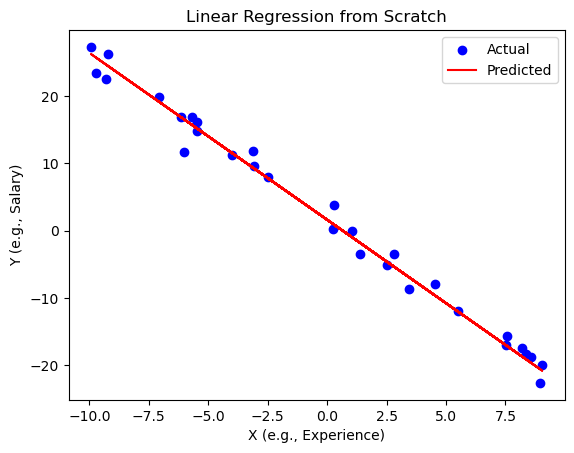

In [68]:
import matplotlib.pyplot as plt

# scatter plot of actual points
plt.scatter(X_test, y_test, color='blue', label='Actual')

# line plot of predictions
plt.plot(X_test, lr.predict(X_test), color='red', label='Predicted')

plt.xlabel('X (e.g., Experience)')
plt.ylabel('Y (e.g., Salary)')
plt.legend()
plt.title('Linear Regression from Scratch')
plt.show()


In [69]:
# Using actual Dataset
import pandas as pd

df = pd.read_csv("placement.csv")
display(df.shape)
display(df.head())

(200, 2)

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [70]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split_manual(X, y, test_size=0.2, random_state=2)

lr = simpleLinearRegression()
lr.fit(X_train, y_train)

print(lr.predict(X_test))
print(lr.predict(X_test).shape)

[[3.26079519]
 [3.05434244]
 [3.74251826]
 [3.50165672]
 [3.38696075]
 [2.97405527]
 [2.32602304]
 [2.77907212]
 [3.209182  ]
 [3.17477321]
 [3.49018713]
 [3.16330361]
 [2.8536245 ]
 [2.96832047]
 [3.69090507]
 [2.95111607]
 [2.97979006]
 [3.76545745]
 [3.93750141]
 [2.32602304]
 [3.31240837]
 [2.92817688]
 [2.76760252]
 [2.59555857]
 [3.15183402]
 [2.21132707]
 [3.35255196]
 [3.92603181]
 [2.36616663]
 [2.62996736]
 [2.54394538]
 [3.53033072]
 [3.10595563]
 [2.1195703 ]
 [2.32602304]
 [2.14824429]
 [2.58982377]
 [3.23785599]
 [2.52674099]
 [2.4865974 ]]
(40, 1)


In [71]:
print(y_test)
y_test.shape

[[3.34]
 [2.61]
 [3.42]
 [3.67]
 [3.83]
 [3.28]
 [3.26]
 [2.79]
 [3.13]
 [2.99]
 [3.58]
 [2.94]
 [3.18]
 [3.08]
 [3.89]
 [2.51]
 [3.09]
 [4.21]
 [3.52]
 [2.48]
 [3.31]
 [3.26]
 [2.6 ]
 [3.18]
 [2.72]
 [2.1 ]
 [3.44]
 [4.09]
 [2.6 ]
 [2.01]
 [2.87]
 [3.99]
 [2.83]
 [1.61]
 [2.18]
 [2.55]
 [2.73]
 [3.33]
 [2.48]
 [2.76]]


(40, 1)

In [72]:
lr.m, lr.b

(array([0.57347985]), array([-1.02309926]))

Text(0, 0.5, 'Package(in lpa)')

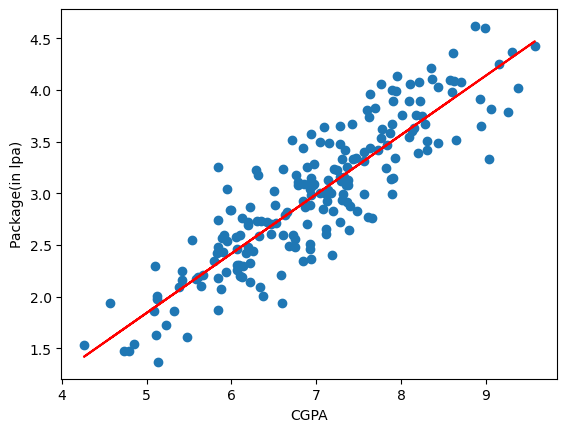

In [75]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')